In [4]:
import qiskit, sys
import numpy as np, matplotlib.pyplot as plt
sys.path.insert(1, '../')
import qtm.base, qtm.constant, qtm.nqubit, qtm.onequbit, qtm.fubini_study

In [5]:
num_qubits = 3
num_layers = 1
theta = np.random.uniform(0, 2*np.pi)
thetas_origin = np.random.uniform(low = 0, high = 2*np.pi, size = num_qubits*num_layers*5)

In [6]:
thetas = thetas_origin.copy()

qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
thetas, loss_values_sgd = qtm.base.fit(
    qc, num_steps = 150, thetas = thetas, 
    create_circuit_func = qtm.nqubit.create_GHZchecker_linear, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.loss.loss_basis,
    optimizer = qtm.optimizer.sgd,
    verbose = 1,
    num_layers = num_layers,
    theta = theta
)

Step: 100%|██████████| 150/150 [09:40<00:00,  3.87s/it]


In [7]:
thetas = thetas_origin.copy()

qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
thetas, loss_values_adam = qtm.base.fit(
    qc, num_steps = 150, thetas = thetas, 
    create_circuit_func = qtm.nqubit.create_GHZchecker_linear, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.loss.loss_basis,
    optimizer = qtm.optimizer.adam,
    verbose = 1,
    num_layers = num_layers,
    theta = theta
)

Step: 100%|██████████| 150/150 [09:05<00:00,  3.63s/it]


In [ ]:
thetas = thetas_origin.copy()
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
loss_values_qng = []
thetass_ghz = []

for i in range(0, 100):
    # fubini_study for binho_state is same for linear state
    G = qtm.fubini_study.calculate_linear_state(qc.copy(), thetas, num_layers)
    grad_loss = qtm.base.grad_loss(
        qc, 
        qtm.nqubit.create_GHZchecker_linear,
        thetas, num_layers = num_layers, theta = theta)
    thetas = np.real(thetas - qtm.constant.learning_rate*(np.linalg.inv(G) @ grad_loss))   
    qc_copy = qtm.nqubit.create_GHZchecker_linear(qc.copy(), thetas, num_layers, theta)
    
    loss = qtm.loss.loss_basis(qtm.base.measure(qc_copy, list(range(qc_copy.num_qubits))))
    loss_values_qng.append(loss)
    thetass_ghz.append(thetas)

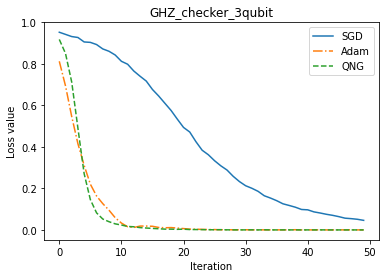

In [18]:
plt.plot(loss_values_sgd[:50], label='SGD', linestyle = '-')
plt.plot(loss_values_adam[:50], label='Adam', linestyle = '-.')
plt.plot(loss_values_qng[:50], label='QNG', linestyle = '--')
plt.title('GHZ_checker_3qubit')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss value")
plt.savefig('GHZ_checker_3qubit.png', format='png', dpi=600)
plt.show() 

np.savetxt("../../experiments/compare_optimizer/GHZchecker_3qubit/loss_values_sgd.csv", loss_values_sgd, delimiter=",")
np.savetxt("../../experiments/compare_optimizer/GHZchecker_3qubit/loss_values_adam.csv", loss_values_adam, delimiter=",")
np.savetxt("../../experiments/compare_optimizer/GHZchecker_3qubit/loss_values_qng.csv", loss_values_qng, delimiter=",")